,cpu,mem
time_stamp,,
1970-01-01 00:55:00,15.0,81.0
1970-01-01 01:00:00,14.0,83.0
1970-01-01 01:05:00,20.0,87.0
1970-01-01 01:10:00,15.0,84.0
1970-01-01 01:15:00,11.0,81.0


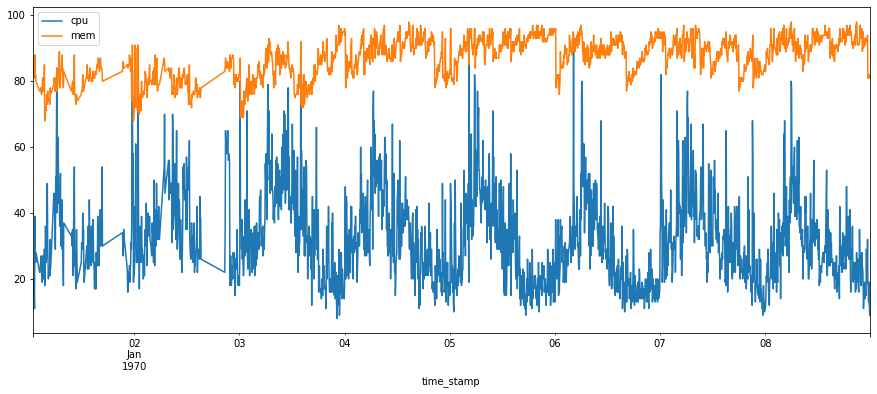

In [1]:
import pandas as pd

df = pd.read_csv('m_1938.csv')
df.columns = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent']
df.time_stamp = pd.to_datetime(df.time_stamp, unit='s')
df.set_index(df.time_stamp, inplace=True)
df = df[['cpu', 'mem']]
df = df.resample('5min').interpolate()
df = df.dropna()
df.plot(figsize=(15, 6))
df.head()

2 85.74729661207326
575 54.35296227390535
1148 2.2065566660028158e-25
1721 1.2177563046249359e-26


1721

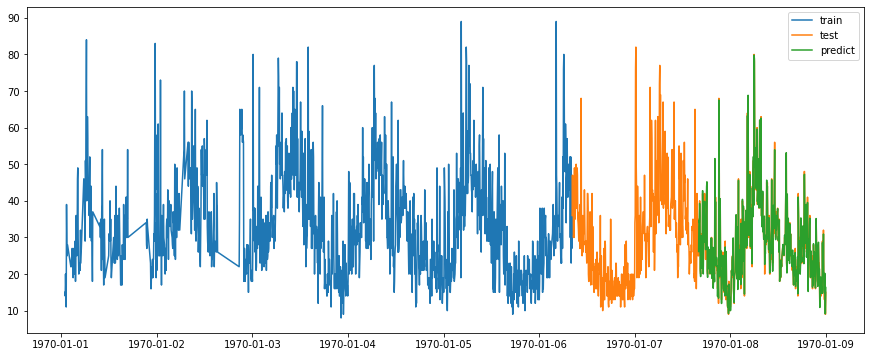

In [32]:
from statsmodels.tsa.ar_model import AR
import pandas as pd
import matplotlib.pyplot as plt

def best_model(serie, plot=False):
    
    orders = [n for n in range(2, len(serie), len(serie)//4)]
    best = 100000
    for order in orders:
        try:
            model = AR(serie).fit(order)
            erro = (model.resid ** 2).mean()
            if erro < best:
                best = erro
                print(order, erro)
                best_order = order
        except:
            pass

    train_size = int(len(serie) * 2/3)
    train_set = serie[:train_size+1]
    test_set = serie[train_size:]
    
    if plot:        
        model_train = AR(train_set).fit(len(train_set)//2-1)
        model_test = AR(test_set).fit(len(test_set)//2-1)
        plt.figure(figsize=(15,6))
        plt.plot(train_set)
        plt.plot(test_set)
        plt.plot(model_test.predict())
        plt.legend(['train', 'test', 'predict'])
    return best_order
best_model(df.cpu, plot=True)

22.736278409856926

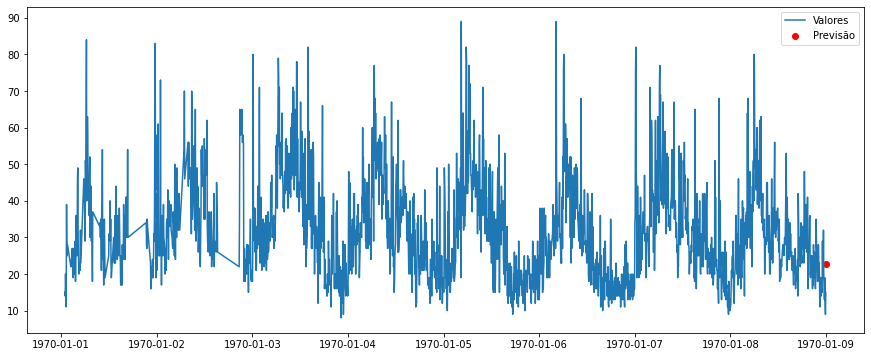

In [33]:
def predict(serie, order, plot=False):
    model = AR(serie).fit(order)
    next_period = serie.index[-1] + pd.Timedelta('5 minute')
    forecast = model.predict(start=next_period, end=next_period)
    if plot:
        plt.figure(figsize=(15, 6))
        plt.plot(serie)
        plt.scatter(serie.index[-1], forecast[0], color='red')
        plt.legend(['Valores', 'Previsão'])
    return forecast[0]
predict(df.cpu, 1721, plot=True)